In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from LRGSG_package.LRGSG_plots import imshow_colorbar_caxdivider, generate_maxpercdiff_colormap
from LRGSG_package.LRGSG_utils import move_to_rootf, width_interval, dv
from LRGSG_package.nx_patches import signed_spectral_layout, get_kth_order_neighbours
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
side = 100
eigenmode = 0
#
theLattice = Lattice2D(#
    side1 = side,
    geometry = 'squared',
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
    initCond = 'all_1', # f'ground_state_{eigenmode}'
    pflip = 0.2,
    t_steps = 10,
    no_obs = 200
)
SLRG_obj.init_weights()
# #
# neg_weightsH = {(SLRG_obj.system.N//2+SLRG_obj.system.side1//2, 
#                  (SLRG_obj.system.N)//2+SLRG_obj.system.side1//2+1): -1}
# SLRG_obj.flip_sel_edges(neg_weightsH, 'H')
#
SLRG_obj.flip_random_fract_edges()

In [3]:
magn, ene = SLRG_obj.run_ising_dynamics(nstepsIsing=100, T=0.3)

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/src/LRGSG_package/LRGSG.py:498: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boltzmann_factor(energy, temp):
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/src/LRGSG_package/LRGSG.py:501: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def neigh_weight_magn(m: NDArray, node_dict: dict) -

RuntimeError: Failed in object mode pipeline (step: object mode backend)
LLVM IR parsing error
<string>:725:48: error: expected value token
  %".583" = call i8* @"PyLong_FromSsize_t"(i64 weight)
                                               ^


In [4]:
SLRG_obj.compute_k_eigvV()
SLRG_obj.find_ising_clusters()
SLRG_obj.mapping_nodes_to_clusters()

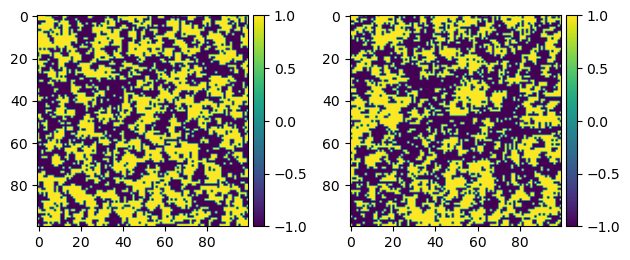

In [6]:
bineigv = SLRG_obj.eigV.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
bineigv[bineigv < 0] = -1
bineigv[bineigv > 0] = +1

fig, ax = plt.subplots(ncols=2)
im1 = ax[0].imshow(
    SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
)
imshow_colorbar_caxdivider(im1, ax[0])
im2 = ax[1].imshow(bineigv)
imshow_colorbar_caxdivider(im2, ax[1])
fig.tight_layout()

In [8]:
ene

[116.0,
 -4020.0,
 -5206.0,
 -5644.0,
 -5920.0,
 -6100.0,
 -6170.0,
 -6212.0,
 -6280.0,
 -6256.0]

In [ ]:
SLRG_obj.numIsing_cl

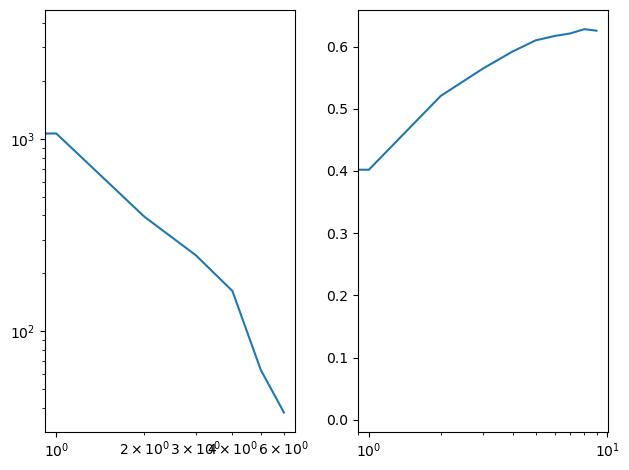

In [12]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.abs(np.roll(dv(np.array(ene)), 2)[2:]))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
#
ax[1].plot(np.abs(ene)/SLRG_obj.system.N)
ax[1].set_xscale('log')
fig.tight_layout()


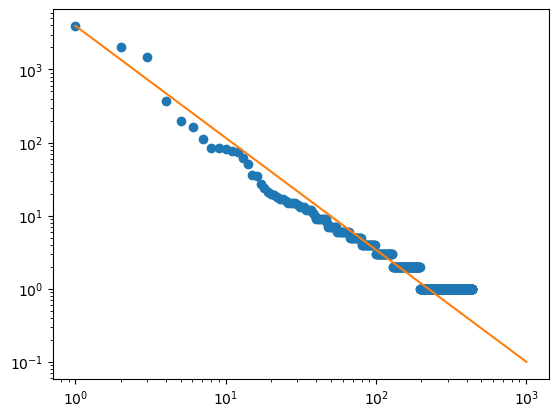

In [ ]:
distr = np.unique(SLRG_obj.mapping, return_counts=True)
zipf  = sorted(distr[1], reverse=True)
plt.plot(np.linspace(1, len(zipf)+1, num=len(zipf)), zipf, 'o')
plt.plot(np.logspace(0, 3), max(zipf)*(np.logspace(0, 2))**-2.3)
plt.yscale('log')
plt.xscale('log')

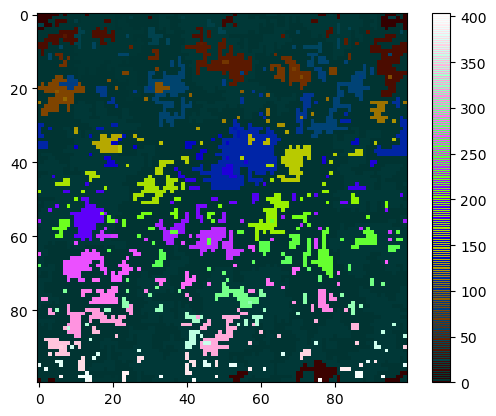

In [13]:
def map_tuple_to_numeric(tuple_value):
    # You can use a weighted sum of the tuple elements as an example
    # Adjust the weights as needed based on your data
    weight = [0.1, 0.2, 0.5]
    numeric_value = np.sum(tuple_value * weight)
    return numeric_value


vfunc = np.vectorize(map_tuple_to_numeric)

# Apply the mapping function to the entire 'result_array'
numeric_array = vfunc(SLRG_obj.mapping)
plt.imshow(
    SLRG_obj.mapping.astype(float),
    cmap=generate_maxpercdiff_colormap(SLRG_obj.numIsing_cl, 2),
)
plt.colorbar()

In [14]:
for T in np.linspace(0, 3, num=20):
    for i in range(100):
        # misurare la magnetizzazione dell'isola maggiore, 
        # mediarla dopo la termalizzazione
        pass
    # mediare tu tutte le realizzazioni
# diagramma di fase m VS T